In [7]:
#Warming Up
import numpy as np
import matplotlib.pyplot as plt
import csv 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

with open("nonprofit-desc.csv") as f:
    c = csv.reader(f)
    descriptions = [row[2] for row in c if not row[2] == ""] 

tf = TfidfVectorizer(min_df=0.0001, max_df=0.1)

# document term matrix 
X = tf.fit_transform(descriptions)
ndim = 700
svd = TruncatedSVD(n_components=ndim, random_state=230)
xpc = svd.fit_transform(X)


### 1. Plot and comment on the graph of cumulative variance explained as a function of the number of components.

Text(0, 0.5, 'proportion of variance explained')

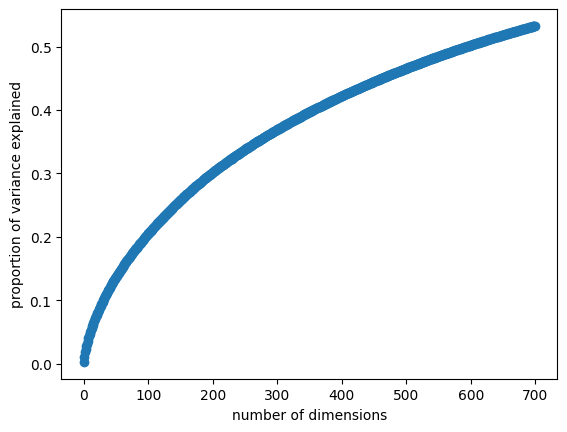

In [8]:
plt.scatter(range(ndim), np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('number of dimensions')
plt.ylabel('proportion of variance explained')

### 2. How many principal components are necessary to explain 50% of the total variation in the data?

About 650 components to explain 50% of the variation.

### 3. Fit the K means model, experimenting with at least two values of K between 2 and 10.

In [ ]:
nt = 2
kmDu = KMeans(n_clusters=nt, random_state=42)
clusDu = kmDu.fit_predict(X)

nf = 5
kmQnQ = KMeans(n_clusters=nf, random_state=42)
clusQnQ = kmQnQ.fit_predict(X)

### 4. Find nonprofit descriptions that are representative of each cluster, and print out a few descriptions in each cluster.

In [20]:
descAr = np.array(descriptions)
for i in range(nt):
    print("Cluster #",i+1)
    print(descAr[clusQnQ == i][:5])

Cluster # 1
['promotion of youth ice sports for madison nj high school students for 2018-2019 season, and recognition of player accomplishments, benefitting approximately 35 to 40 youth foundation for morristown medical center- hockey fights cancer'
 'organization provides youth sports to children of age within its jurisdiction at a low cost'
 'clay county fair held july 9-12 2015 provided educational experiences for 4-h & ffa youth & county residents through exhibits & demonstrations'
 'aisa trains native american youth and adults in the principles of scouting in order to bring together the various tribes in a positive project'
 'provide for the advancement of amateur youth soccer for over 600 players in the town of southborough, ma']
Cluster # 2
['human services programs, general/other: community based programs to feed 150-200 individuals weekly who are homeless, unemployed, elderly, on fixed income, on welfare, or otherwise disadvantaged.'
 'volunteer fire protection services for th

In [19]:
descAr = np.array(descriptions)
for i in range(nf):
    print("Cluster #",i+1)
    print(descAr[clusQnQ == i][:5])

Cluster # 1
['promotion of youth ice sports for madison nj high school students for 2018-2019 season, and recognition of player accomplishments, benefitting approximately 35 to 40 youth foundation for morristown medical center- hockey fights cancer'
 'organization provides youth sports to children of age within its jurisdiction at a low cost'
 'clay county fair held july 9-12 2015 provided educational experiences for 4-h & ffa youth & county residents through exhibits & demonstrations'
 'aisa trains native american youth and adults in the principles of scouting in order to bring together the various tribes in a positive project'
 'provide for the advancement of amateur youth soccer for over 600 players in the town of southborough, ma']
Cluster # 2
['human services programs, general/other: community based programs to feed 150-200 individuals weekly who are homeless, unemployed, elderly, on fixed income, on welfare, or otherwise disadvantaged.'
 'volunteer fire protection services for th

### 5. Comment on how well the clustering appears to be working

I think it worked alright. Cluster #1 looks to be about youth oriented programs and Cluster #2 is like community/education oriented.

Five cluster grouping seemed to work pretty well until #4. Cluster #1 looks basically the same, #2 is more community service type non-profits, #3 is related to students or education, #4 seems to be clustering descriptions that have the word pattern "pol/pro(viding,grams)/pur/pub", otherwise not sure what it would be. I think cluster #2 kind of split to form the new #2 and #3. #5 groups all the none responses basically. I wonder what would happen to cluster #5 if I cleared out all the "none" type entries and if that would effect cluster #4 at all. In other words, would having the ability to focus on smaller degrees of association refine the clusters or is it a sign the algorithm is "grasping at straws"?